In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
import string
from nltk.corpus import stopwords

In [ ]:
from sklearn.model_selection import train_test_split
#imported the 20newsgroups data from sklearn datasets
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups()
len(newsgroups)

5

In [ ]:
df = pd.read_csv("stops_1.csv")
stops_more= np.array(df)
punctuations = list(string.punctuation)
df.head()
stops_more = df.iloc[:,0]
len(stops_more)

556

In [ ]:
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)
more_stops=np.loadtxt("stops.txt", dtype=str, delimiter=" ")
stops.update(more_stops)
more_stops=np.loadtxt("more_stops.txt", dtype=str, delimiter=" ")
stops.update(more_stops)
len(stops)


1027

In [ ]:
documents = newsgroups.data
categories = newsgroups.target

In [ ]:
modified_documents = [word_tokenize(doc) for doc in documents]
x_data = modified_documents
x_train, x_test, y_train, y_test=train_test_split(modified_documents, categories, random_state=1)


In [ ]:
all_words = []
for doc in  x_train:
  for word in doc:
    if((word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word!="n't" and word[0]!="."):
      all_words.append(word)
len(all_words)


1135091

In [ ]:
# This function finds the frequency of each word in all documents and returns the dictionary with words as keys
#and its corresponding frequency as values
def freq_dict(all_words):
  freq_dictionary = {}
  for word in all_words:
    if(word not in freq_dictionary.keys()):
      freq_dictionary[word] = 1
    else:
      freq_dictionary[word] = freq_dictionary[word] + 1
  len(freq_dictionary.keys())
  return freq_dictionary
freq_dict(all_words)

In [ ]:
dictionary = freq_dict(all_words)
freq = np.array([i for i in dictionary.values()])
words = np.array([i for i in dictionary.keys()])

freq = np.sort(freq)[::-1]
words = words[np.argsort(freq)][::-1]

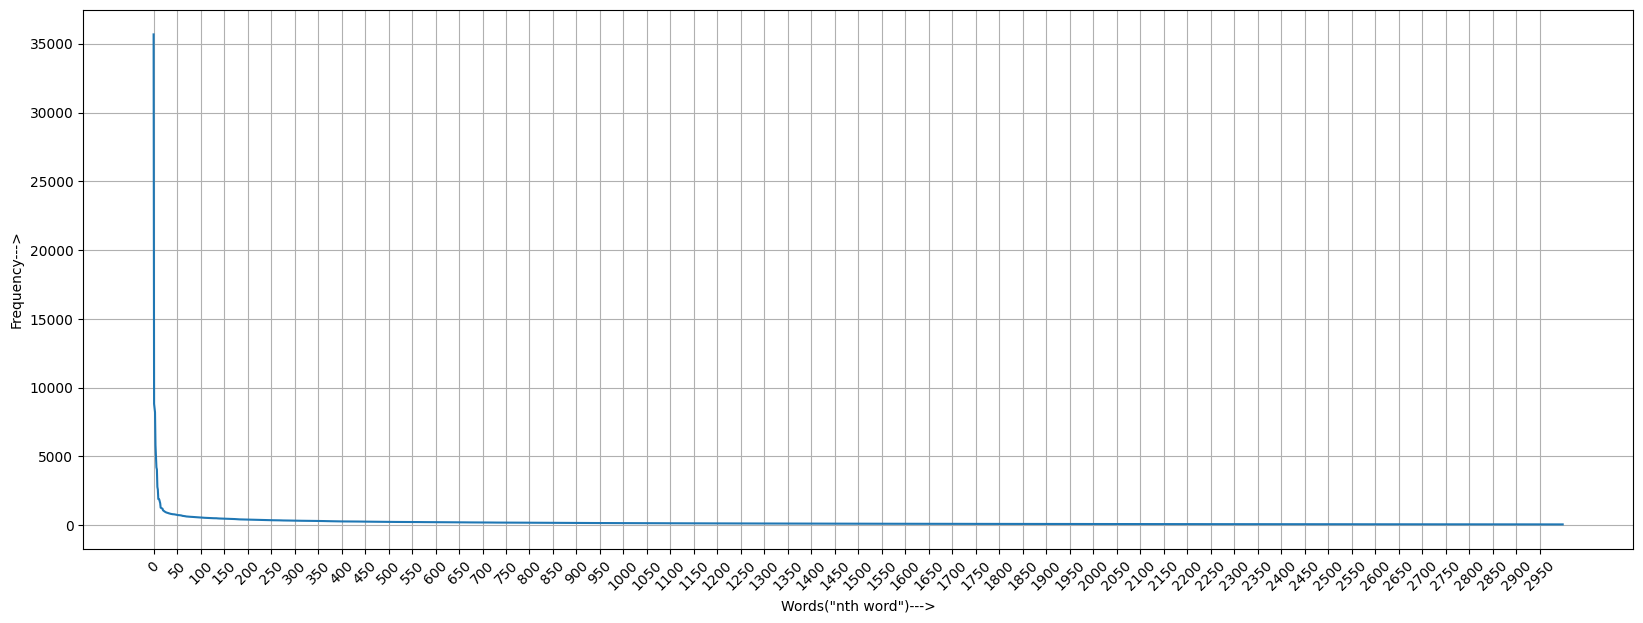

In [ ]:
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0
upper_limit=3000
difference_between_each_xtick=50
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()

In [ ]:
features = words[10:4000]
freq[5], freq[10],freq[15],freq[3000], freq[4000],freq[5000]

(4982, 1902, 1276, 58, 43, 34)

In [ ]:
# This function takes the data and returns 2-d array with fearures as columns.
def data_modifier(x_data, features):
  modified_data = np.zeros((len(x_data), len(features)))
  for i in range(len(x_data)):
    for word in x_data[i]:
      if word in features:
        for j in range(len(features)):
          if(word == features[j]):
            modified_data[i][j]+=1
  return modified_data
x_train_modified = data_modifier(x_train, features)
x_test_modified = data_modifier(x_test, features)
df = pd.DataFrame(x_train_modified)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Multinomial naive bayes from sklearn
clf = MultinomialNB()
clf.fit(x_train_modified, y_train)
y_predict_1 = clf.predict(x_test_modified)
clf.score(x_test_modified, y_test)

In [ ]:
#Naive Bayes Classifier code

In [ ]:
#fit function takes training data and returns dictionary
def fit(x_train, y_train, features):
  classes = set(y_train)
  dictionary = {}
  dictionary['total_data'] = len(x_train)

  for class_ in classes:
    dictionary[class_] = {}
    x_current_class = (y_train == class_)
    x_current_class_rows = x_train[x_current_class]
    y_current_class_rows = y_train[x_current_class]
    dictionary[class_]['total_class_data'] = 0
    dictionary[class_]['total_class_count'] = len(y_current_class_rows)
    for i in range(len(features)):
      dictionary[class_][features[i]] = x_current_class_rows[:,i].sum()
      dictionary[class_]['total_class_data'] += dictionary[class_][features[i]]
  return dictionary


In [ ]:
#probability function
def probability(class_, dictionary, x_test, features):
  output = np.log(dictionary[class_]['total_class_count']) - np.log(dictionary['total_data'])
  for x in x_test:
    for i in range(len(features)):
      if(features[i] == x):
        count_current_class_feature = dictionary[class_][features[i]] + 1
        count_current_class = dictionary[class_]['total_class_data'] + len(dictionary.keys()-1)
        current_p = np.log(count_current_class_feature) - np.log(count_current_class)
        output = output + current_p

  return output

In [ ]:
# This function finds the class with best probability and returns the class.
def predictsinglepoint(dictionary, x, features):
  classes = dictionary.keys()
  best_p = -1
  best_class = -1
  for class_ in classes:
    if (class_!= 'total_data'):
      current_p = probability(class_, dictionary, x, features)
      if(current_p>best_p):
        best_p = current_p
        best_class = class_
  return best_class

In [ ]:
#This function predicts the class for testing data and returns the predicted values.
def predict(x_test, dictionary, features):
  y_pred = []
  for x in x_test:
    x_class = predictsinglepoint(dictionary, x, features)
    y_pred.append(x_class)
  return y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

In [ ]:

dictionary = fit(x_train_modified, y_train, features)
y_predict_2 = predict(x_test_modified, dictionary, features)

In [ ]:
from matplotlib import pyplot as plt
n  =  len(x_test_modified)
l = []
for i in range(n):
  l.append(i)

plt.figure(figsize=(100, 20))
# red colour plot indicates the predicted values from sklearn multinomial naive bayes
plt.plot(l, y_pred_1, "r")
# blue colour plot indicates the predicted values from above written naive bayes program.
plt.plot(l, y_pred_2, "b")
plt.xlabel('x_test number')
plt.ylabel('predicted_class')
plt.show()
